# Importing Libraries

In [2]:
!pip install better_profanity

In [1]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:
consumer_key = 'VqKJ8JCsNLdgCmL5IrHeAun2Y'
consumer_secret = 'PC1AULsG8744uZha8Hv4Mj0YxHI6fB0Zl3Sr57kKhoLhXegdmj'
access_token = '1261640525876047873-pBZdT4Kuj4bYll1kyWQtCe7xQ5em4s'
access_token_secret = 'WgKN4BqRy5wCL8ePEngq31vp2gfQ6s7JjDglhcuMBNElj'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, q=filtered,lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [5]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [6]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [7]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

C:\Users\LAKSHYA\AppData\Local\Temp\ipykernel_23800\3588238994.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['may allah have mercy muslims turkey country syria calamity this earthquake give',
 'i get there needs be platform but surely like you say strikes cost living earthquake i',
 'heartbreaking sofar more than 4 300 people have died rescuers are racing pull survivors beneath',
 'how about indonesia ring fire actually i live jakarta capital city indonesia i need',
 'our correspondent is broadcasting alone earthquake epicentre using her mobile phone amp turki',
 'syrian journalist omar al bam no help has arrived outside syria people are saving their families childr',
 'tragedies amp continue regrettably will continue mid long term please wi',
 'girl rescued rubble two days after turkish hatay meanwhile death toll earthquake',
 'why was earthquake turkey so catastrophic how strong was it compared others by nick allen',
 'terrible earthquake may injured recover soon',
 'turkey earthquake india s julie romeo honey rambo dog squad engaged rescue operations with ndrf',
 'you should demand that t

In [8]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("may allah have mercy muslims turkey country syria calamity this earthquake give"))

In [9]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.0,
  'may allah have mercy muslims turkey country syria calamity this earthquake give'],
 [0.5,
  'i get there needs be platform but surely like you say strikes cost living earthquake i'],
 [0.5,
  'heartbreaking sofar more than 4 300 people have died rescuers are racing pull survivors beneath'],
 [0.13636363636363635,
  'how about indonesia ring fire actually i live jakarta capital city indonesia i need'],
 [0.0,
  'our correspondent is broadcasting alone earthquake epicentre using her mobile phone amp turki'],
 [0.0,
  'syrian journalist omar al bam no help has arrived outside syria people are saving their families childr'],
 [-0.025,
  'tragedies amp continue regrettably will continue mid long term please wi'],
 [0.0,
  'girl rescued rubble two days after turkish hatay meanwhile death toll earthquake'],
 [0.4333333333333333,
  'why was earthquake turkey so catastrophic how strong was it compared others by nick allen'],
 [-1.0, 'terrible earthquake may injured recover soon'],
 [0

In [10]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.000000
1     0.500000
2     0.500000
3     0.136364
4     0.000000
        ...   
95    0.000000
96    0.000000
97   -0.200000
98    0.000000
99    0.000000
Name: polarity, Length: 100, dtype: float64

In [11]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Positive
Positive
Positive
Neutral
Neutral
Negative
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Negative
Positive
Positive
Neutral
Negative
Negative
Negative
Positive
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Negative
Positive
Positive
Positive
Neutral
Negative
Neutral
Negative
Negative
Neutral
Positive
Neutral
Positive
Positive
Neutral
Negative
Neutral
Negative
Positive
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Positive
Neutral
Positive
Neutral
Positive
Negative
Negative
Neutral
Positive
Positive
Negative
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
31 22 47


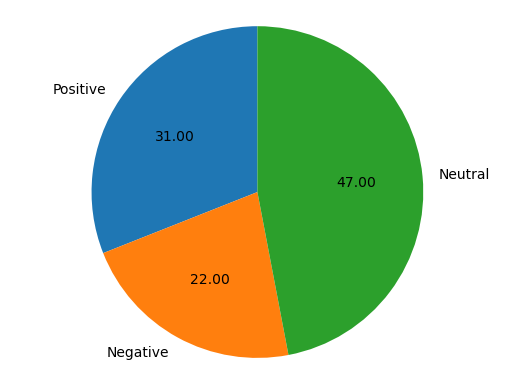

In [14]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [15]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

31.000000 percent of twitter users feel positive about earthquake
22.000000 percent of twitter users feel negative about earthquake
47.000000 percent of twitter users feel neutral about earthquake


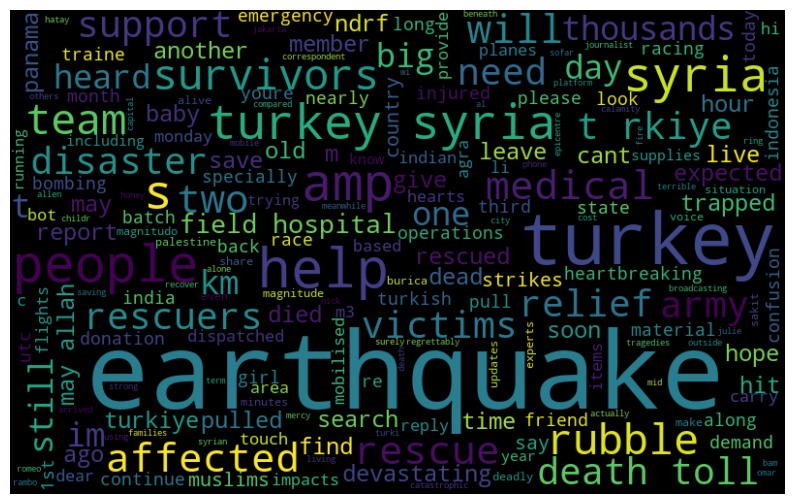

In [16]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()